<a href="https://colab.research.google.com/github/nguyenduongtri5703/sugarcane_leaf_disease_classification/blob/main/Sugarcane_Leaf_Disease_With_Supervised_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip drive/MyDrive/dataset/SugarcaneLeafDataset.zip

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
  inflating: SugarcaneLeafDataset/Brown Spot/image564.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image565.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image566.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image567.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image568.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image569.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image570.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image571.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image572.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image573.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image574.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image575.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image576.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image577.jpg  
  inflating: SugarcaneLeafDataset/Brown Spot/image578.jpg  
  inflating: SugarcaneLeafDataset/Brown Spo

1. Import thư viện

In [ ]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

2. Load hình ảnh và chuyển đổi thành DataFrame

In [ ]:
# Đường dẫn thư mục chứa hình ảnh
data_dir = '/content/SugarcaneLeafDataset'
categories = os.listdir(data_dir)
data = []
labels = []

# Load từng hình ảnh và resize về kích thước nhỏ hơn để giảm tải
for category in categories:
    folder_path = os.path.join(data_dir, category)
    label = categories.index(category)  # Tạo nhãn số cho mỗi loại bệnh
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        try:
            img = imread(img_path)
            img_resized = resize(img, (64, 64))  # Resize ảnh về 64x64
            data.append(img_resized.flatten())  # Chuyển ảnh thành vector phẳng
            labels.append(label)
        except:
            print(f"Không thể load hình ảnh {img_path}")

# Chuyển đổi danh sách thành numpy array
data = np.array(data)
labels = np.array(labels)

3. Tách đặc trưng và nhãn (input features và targets)

In [ ]:
# Biến data là các đặc trưng (features) và labels là nhãn (targets)
X = data
y = labels

In [ ]:
X.shape

(6748, 12288)

4. Chia dữ liệu thành tập huấn luyện và tập kiểm tra

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

5. Xây dựng và huấn luyện mô hình

In [ ]:
# Khởi tạo mô hình SVM với GridSearchCV để tìm tham số tốt nhất
param_grid={'C':[0.1,1,10],
            'kernel':['rbf','poly']}
svc = svm.SVC()
clf = GridSearchCV(svc, param_grid, cv=5)
clf.fit(X_train, y_train)

# Hiển thị tham số tốt nhất
print("Best parameters found: ", clf.best_params_)

Best parameters found:  {'C': 10, 'kernel': 'rbf'}


6. Đánh giá mô hình

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Tính accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Hiển thị báo cáo phân loại
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.8879012345679013
                  precision    recall  f1-score   support

    Dried Leaves       0.95      0.86      0.91       118
    Pokkah Boeng       0.69      0.64      0.66        96
       BrownRust       0.73      0.78      0.75        86
     Yellow Leaf       0.94      0.95      0.94       369
      Brown Spot       0.93      0.98      0.95       506
   Viral Disease       0.84      0.86      0.85       193
Banded Chlorosis       0.82      0.71      0.76       144
        Sett Rot       0.96      1.00      0.98       172
            smut       0.58      0.55      0.57       101
  Healthy Leaves       0.99      0.96      0.97       138
    Grassy shoot       0.98      0.93      0.95       102

        accuracy                           0.89      2025
       macro avg       0.85      0.84      0.84      2025
    weighted avg       0.89      0.89      0.89      2025



7. Dự đoán

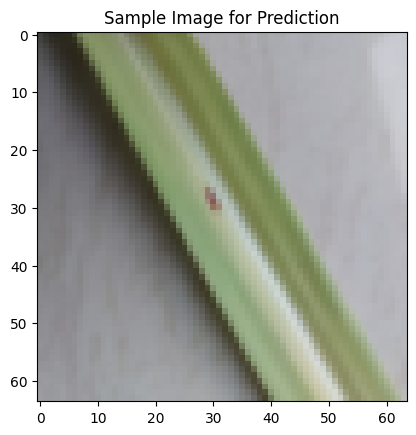

Predicted Category: Brown Spot


In [ ]:
# Lấy một mẫu từ tập kiểm tra để dự đoán
sample_index = 0
sample_image = X_test[sample_index].reshape(64, 64, 3)

# Hiển thị hình ảnh mẫu
plt.imshow(sample_image)
plt.title("Sample Image for Prediction")
plt.show()

# Dự đoán loại bệnh
predicted_label = clf.predict([X_test[sample_index]])
print("Predicted Category:", categories[predicted_label[0]])

8. Xây dựng và huấn luyện mô hình Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Khởi tạo mô hình Random Forest và thực hiện GridSearchCV để tìm tham số tốt nhất
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20, None]}
rf = RandomForestClassifier(random_state=42)
clf = GridSearchCV(rf, param_grid, cv=5)
clf.fit(X_train, y_train)

# Hiển thị tham số tốt nhất
print("Best parameters found: ", clf.best_params_)

Best parameters found:  {'max_depth': 20, 'n_estimators': 200}


9. Đánh giá mô hình

In [ ]:
# Dự đoán trên tập kiểm tra
y_pred = clf.predict(X_test)

# Tính accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Hiển thị báo cáo phân loại
print(classification_report(y_test, y_pred, target_names=categories))

Accuracy: 0.8330864197530864
                  precision    recall  f1-score   support

    Dried Leaves       0.95      0.81      0.88       118
    Pokkah Boeng       0.54      0.38      0.44        96
       BrownRust       0.66      0.65      0.65        86
     Yellow Leaf       0.94      0.89      0.91       369
      Brown Spot       0.82      0.98      0.89       506
   Viral Disease       0.83      0.80      0.82       193
Banded Chlorosis       0.80      0.70      0.75       144
        Sett Rot       0.88      0.99      0.93       172
            smut       0.43      0.33      0.37       101
  Healthy Leaves       0.96      0.95      0.96       138
    Grassy shoot       0.87      0.84      0.86       102

        accuracy                           0.83      2025
       macro avg       0.79      0.76      0.77      2025
    weighted avg       0.83      0.83      0.83      2025



10. Dự đoán

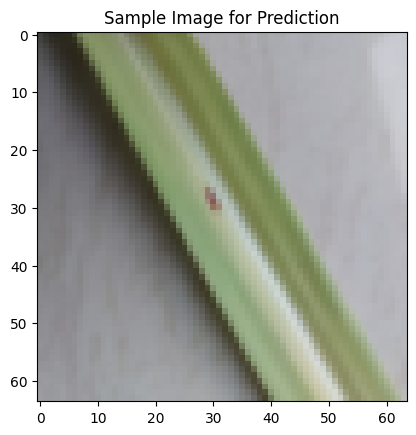

Predicted Category: Brown Spot


In [ ]:
# Lấy một mẫu từ tập kiểm tra để dự đoán
sample_index = 0
sample_image = X_test[sample_index].reshape(64, 64, 3)

# Hiển thị hình ảnh mẫu
plt.imshow(sample_image)
plt.title("Sample Image for Prediction")
plt.show()

# Dự đoán loại bệnh
predicted_label = clf.predict([X_test[sample_index]])
print("Predicted Category:", categories[predicted_label[0]])